In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [3]:
data1 = pd.read_csv('channelWidth.csv').drop_duplicates()
data1['rts']=False;
data1

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,rts
0,1,1,1,1,3,48.522100,0.000212,1.435760,55.0874,866351552,...,1.01348,1.01348,121.000,121.000,120.4650,814056.0,ns3::ThompsonSamplingWifiManager,1,0,False
1,1,2,1,1,3,48.276700,0.000210,1.458810,55.3595,870481736,...,1.03188,1.03188,120.998,120.998,119.6870,831063.0,ns3::ThompsonSamplingWifiManager,1,0,False
2,1,3,1,1,3,0.437347,0.000012,0.057316,106.5380,1675598688,...,1.00704,1.00704,121.000,121.000,13.0074,62852.3,ns3::ThompsonSamplingWifiManager,1,0,False
3,1,4,1,1,3,4.355680,0.000021,0.132654,102.3480,1609654792,...,1.01033,1.01033,121.000,121.000,21.8570,139743.0,ns3::ThompsonSamplingWifiManager,1,0,False
4,1,1,1,1,3,48.724500,0.000119,0.917344,104.1030,1637186296,...,1.01576,1.01576,121.000,121.000,127.3750,982894.0,ns3::ThompsonSamplingWifiManager,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3,4,1,1,3,23.174100,0.000021,0.234805,496.3350,7806053872,...,1.00904,1.00904,121.000,121.000,108.4910,1199540.0,ns3::ThompsonSamplingWifiManager,7,0,False
92,3,1,1,1,3,51.317200,0.000131,0.956677,98.8367,1554405368,...,1.01011,1.01011,120.998,120.998,132.9230,973209.0,ns3::ThompsonSamplingWifiManager,8,0,False
93,3,2,1,1,3,84.842800,0.000197,0.969475,97.9296,1540075784,...,1.01737,1.01737,121.000,121.000,198.1820,977137.0,ns3::ThompsonSamplingWifiManager,8,0,False
94,3,3,1,1,3,0.383417,0.000011,0.017349,643.5340,10121743984,...,1.00209,1.00209,121.000,121.000,73.0694,114924.0,ns3::ThompsonSamplingWifiManager,8,0,False


In [4]:
data2 = pd.read_csv('channelWidthrts.csv').drop_duplicates()
data2['rts']=True;
data2

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,rts
0,1,1,1,1,3,49.95110,0.000224,1.459850,53.5710,842302360,...,1.03950,1.03950,120.997,120.997,123.4740,804736.0,ns3::ThompsonSamplingWifiManager,1,0,True
1,1,2,1,1,3,49.30810,0.000219,1.470220,54.2470,853123656,...,1.01525,1.01525,121.000,121.000,122.0800,820865.0,ns3::ThompsonSamplingWifiManager,1,0,True
2,1,3,1,1,3,2.26073,0.000016,0.074846,104.5870,1644911864,...,1.00738,1.00738,121.000,121.000,17.1414,80572.7,ns3::ThompsonSamplingWifiManager,1,0,True
3,1,4,1,1,3,4.35050,0.000021,0.133238,102.3530,1609741888,...,1.01020,1.01020,121.000,121.000,21.8473,140366.0,ns3::ThompsonSamplingWifiManager,1,0,True
4,1,1,1,1,3,50.38250,0.000126,0.942015,100.7390,1584248736,...,1.01778,1.01778,121.000,121.000,130.9140,976692.0,ns3::ThompsonSamplingWifiManager,2,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,3,4,1,1,3,31.04410,0.000021,0.174348,681.3530,10715955680,...,1.00898,1.00898,121.000,121.000,147.1870,1222710.0,ns3::ThompsonSamplingWifiManager,8,0,True
92,3,1,1,1,3,51.56570,0.000132,0.960560,98.3296,1546468936,...,1.00909,1.00909,121.000,121.000,133.3840,972170.0,ns3::ThompsonSamplingWifiManager,7,0,True
93,3,2,1,1,3,84.88470,0.000197,0.971491,97.6576,1535818776,...,1.01579,1.01579,121.000,121.000,198.3890,976462.0,ns3::ThompsonSamplingWifiManager,7,0,True
94,3,3,1,1,3,10.77290,0.000015,0.202920,576.4190,9066100736,...,1.00242,1.00242,121.000,121.000,90.0376,1203990.0,ns3::ThompsonSamplingWifiManager,7,0,True


In [5]:
data = pd.concat([data1, data2], ignore_index=True)
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,rts
0,1,1,1,1,3,48.522100,0.000212,1.435760,55.0874,866351552,...,1.01348,1.01348,121.000,121.000,120.4650,814056.0,ns3::ThompsonSamplingWifiManager,1,0,False
1,1,2,1,1,3,48.276700,0.000210,1.458810,55.3595,870481736,...,1.03188,1.03188,120.998,120.998,119.6870,831063.0,ns3::ThompsonSamplingWifiManager,1,0,False
2,1,3,1,1,3,0.437347,0.000012,0.057316,106.5380,1675598688,...,1.00704,1.00704,121.000,121.000,13.0074,62852.3,ns3::ThompsonSamplingWifiManager,1,0,False
3,1,4,1,1,3,4.355680,0.000021,0.132654,102.3480,1609654792,...,1.01033,1.01033,121.000,121.000,21.8570,139743.0,ns3::ThompsonSamplingWifiManager,1,0,False
4,1,1,1,1,3,48.724500,0.000119,0.917344,104.1030,1637186296,...,1.01576,1.01576,121.000,121.000,127.3750,982894.0,ns3::ThompsonSamplingWifiManager,2,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,3,4,1,1,3,31.044100,0.000021,0.174348,681.3530,10715955680,...,1.00898,1.00898,121.000,121.000,147.1870,1222710.0,ns3::ThompsonSamplingWifiManager,8,0,True
188,3,1,1,1,3,51.565700,0.000132,0.960560,98.3296,1546468936,...,1.00909,1.00909,121.000,121.000,133.3840,972170.0,ns3::ThompsonSamplingWifiManager,7,0,True
189,3,2,1,1,3,84.884700,0.000197,0.971491,97.6576,1535818776,...,1.01579,1.01579,121.000,121.000,198.3890,976462.0,ns3::ThompsonSamplingWifiManager,7,0,True
190,3,3,1,1,3,10.772900,0.000015,0.202920,576.4190,9066100736,...,1.00242,1.00242,121.000,121.000,90.0376,1203990.0,ns3::ThompsonSamplingWifiManager,7,0,True


In [6]:
# Flow 0
df0 = (
    data.query("rts == True")
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'rts'], as_index=False)
        .sum(numeric_only=True)
        .assign(rts=True)  # ustawiamy rts na True
)

# Flow 1
df1 = (
    data.query("rts == False")
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'flow','rts'], as_index=False)
        .sum(numeric_only=True)
        .assign(rts=False)  # ustawiamy rts na False
)

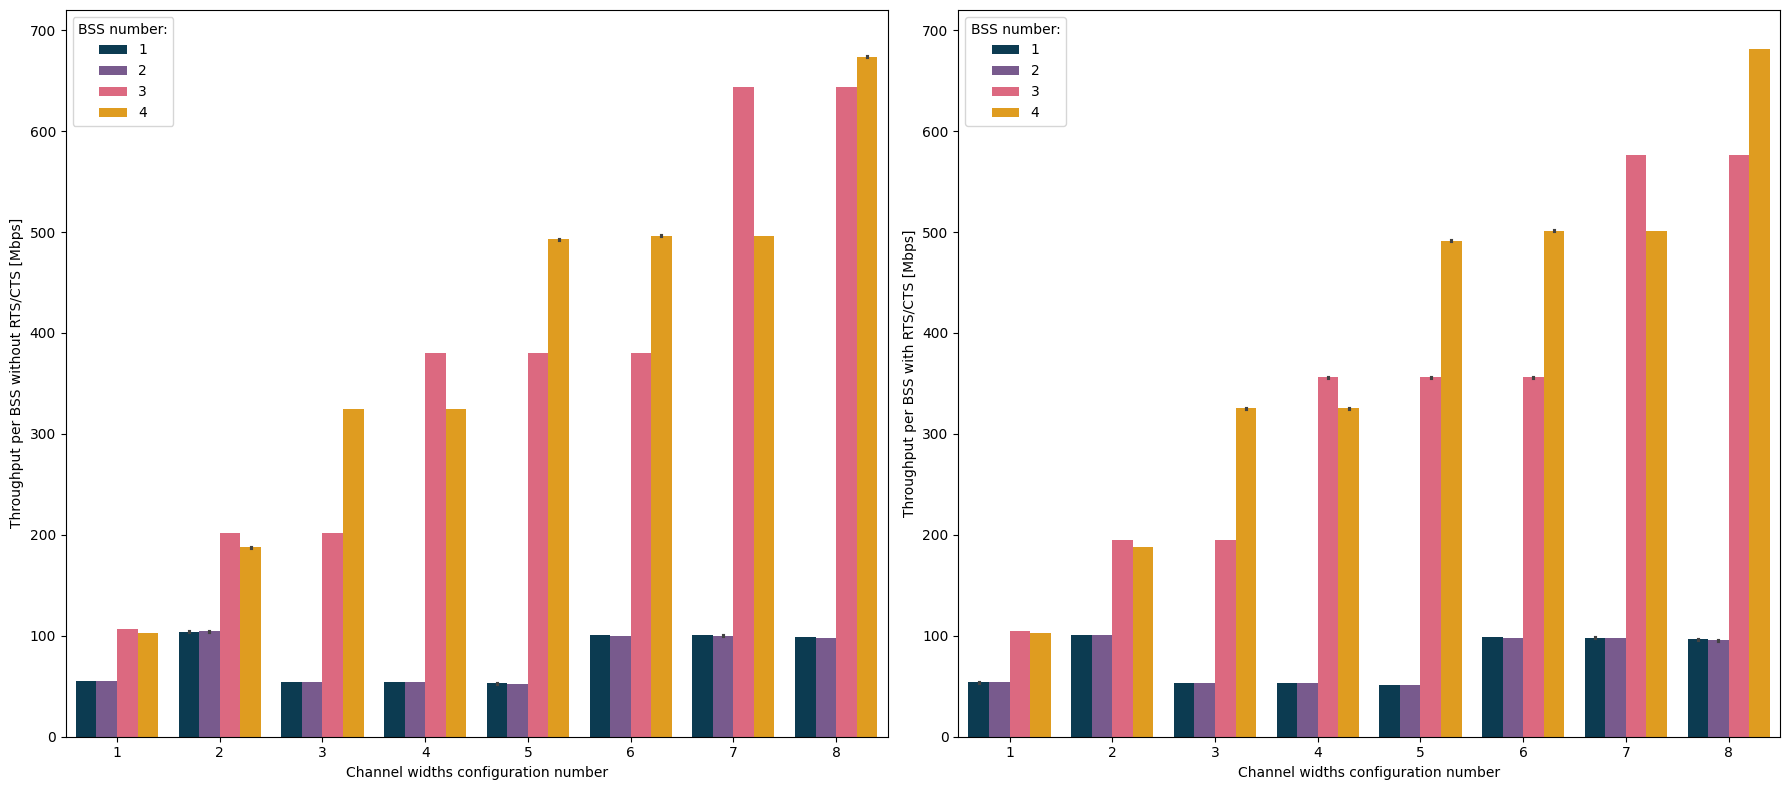

In [7]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Channel widths configuration number"

# Listy danych i tytułów do iteracji
plot_data = [
    (df1, 'Throughput per BSS without RTS/CTS [Mbps]'),
    (df0, 'Throughput per BSS with RTS/CTS [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='scenario', y='throughput', hue='flow',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 720) #, 225
        
# ----------- Zapis i wyświetlenie -----------


plt.tight_layout()
plt.savefig('width_thr.svg', bbox_inches='tight')
plt.show()

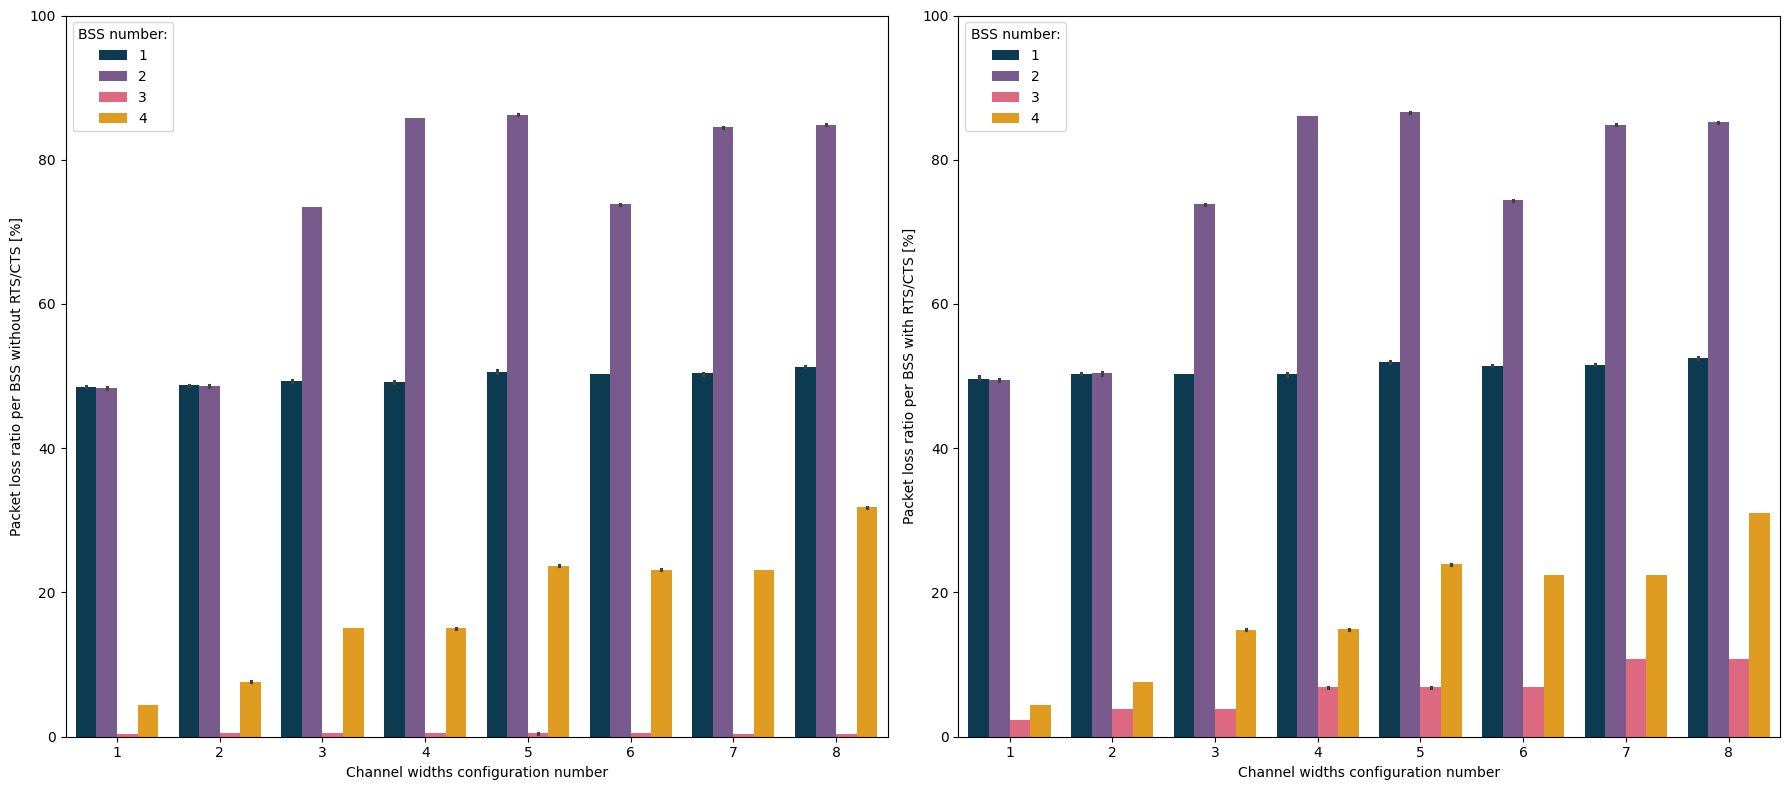

In [8]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Channel widths configuration number"

# Listy danych i tytułów do iteracji
plot_data = [
    (df1, 'Packet loss ratio per BSS without RTS/CTS [%]'),
    (df0, 'Packet loss ratio per BSS with RTS/CTS [%]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='scenario', y='loss', hue='flow',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 100) #, 225

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('width_loss.svg', bbox_inches='tight')
plt.show()

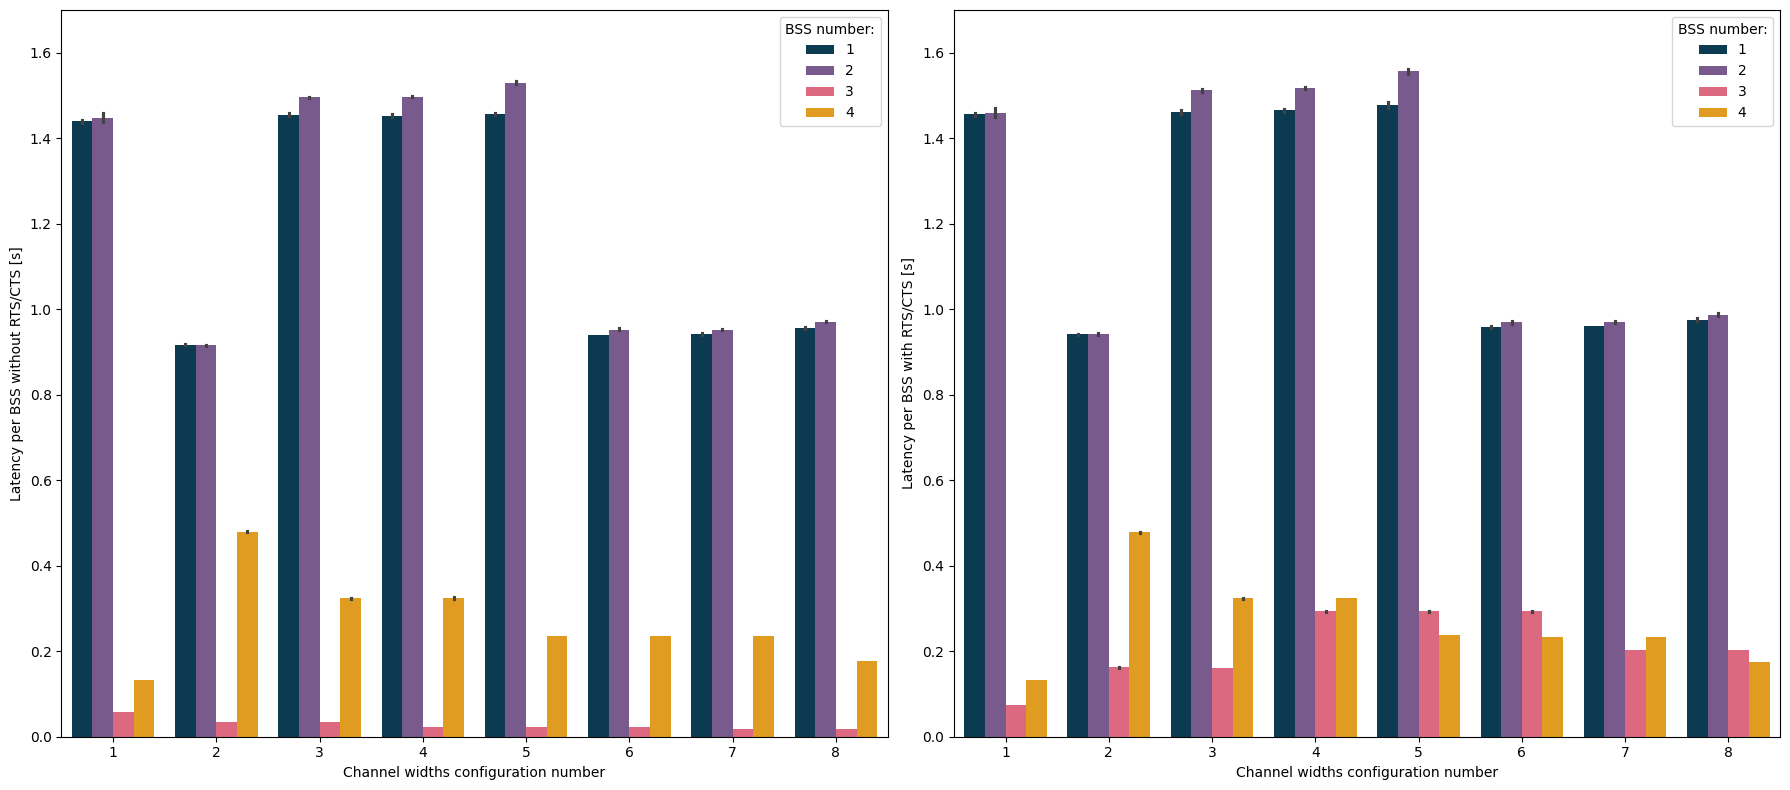

In [9]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Channel widths configuration number"

# Listy danych i tytułów do iteracji
plot_data = [
    (df1, 'Latency per BSS without RTS/CTS [s]'),
    (df0, 'Latency per BSS with RTS/CTS [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='scenario', y='latency', hue='flow',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 1.7) #, 225

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('width_lat.svg', bbox_inches='tight')
plt.show()

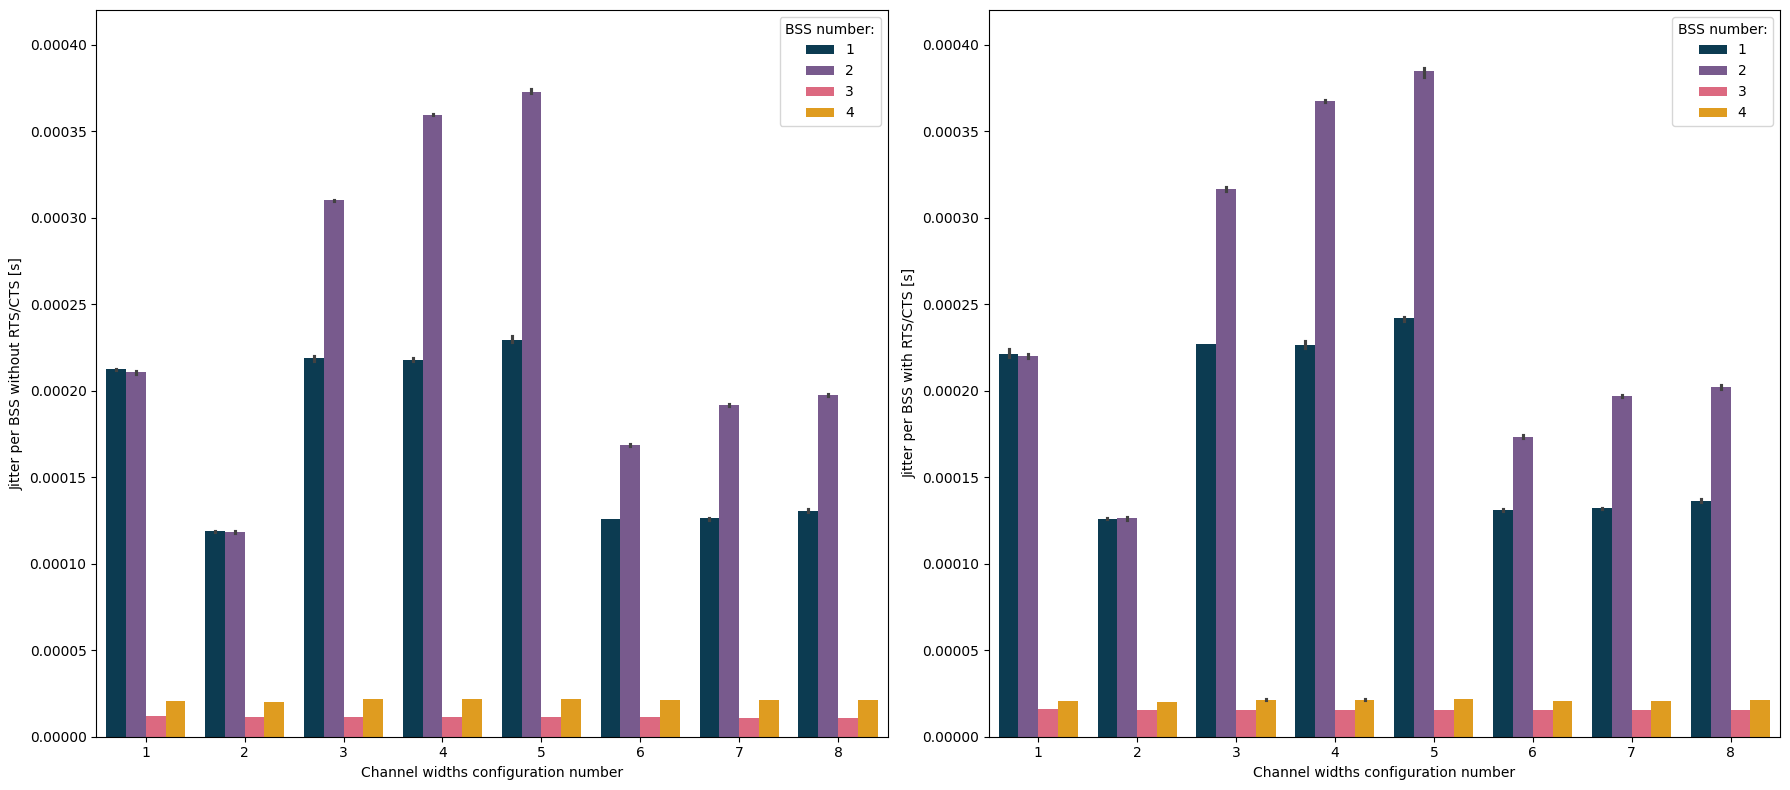

In [10]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Channel widths configuration number"

# Listy danych i tytułów do iteracji
plot_data = [
    (df1, 'Jitter per BSS without RTS/CTS [s]'),
    (df0, 'Jitter per BSS with RTS/CTS [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='scenario', y='jitter', hue='flow',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        labels=['1', '2', '3', '4'],
        ncol=1,              # Liczba kolumn w legendzie
        fontsize='medium',   # Rozmiar czcionki
        title='BSS number:',         # <- Tytuł legendy
        title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 0.00042) #, 225

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('width_jitt.svg', bbox_inches='tight')
plt.show()